In [1]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'D:/team/train',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=1,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        'D:/team/test',
        target_size=(150, 150),
        batch_size=1,
        class_mode='categorical')


Found 7443 images belonging to 3 classes.
Found 3717 images belonging to 3 classes.


In [52]:
total_train_samples = train_generator.n
total_validation_samples = validation_generator.n

print("Total training samples:", total_train_samples)
print("Total validation samples:", total_validation_samples)


Total training samples: 7443
Total validation samples: 3717


In [9]:



history = model.fit(
    train_generator,
    steps_per_epoch=40,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=20,
    verbose=2,

)


Epoch 1/100
40/40 - 5s - loss: 0.2888 - acc: 0.9500 - val_loss: 0.2917 - val_acc: 0.9500 - 5s/epoch - 113ms/step
Epoch 2/100
40/40 - 4s - loss: 0.3607 - acc: 0.9250 - val_loss: 0.2238 - val_acc: 0.9000 - 4s/epoch - 109ms/step
Epoch 3/100
40/40 - 4s - loss: 0.4215 - acc: 0.9000 - val_loss: 0.4190 - val_acc: 0.9000 - 4s/epoch - 108ms/step
Epoch 4/100
40/40 - 4s - loss: 0.2696 - acc: 0.9500 - val_loss: 0.0044 - val_acc: 1.0000 - 4s/epoch - 106ms/step
Epoch 5/100
40/40 - 4s - loss: 0.0985 - acc: 0.9500 - val_loss: 0.0130 - val_acc: 1.0000 - 4s/epoch - 107ms/step
Epoch 6/100
40/40 - 4s - loss: 0.0241 - acc: 1.0000 - val_loss: 8.4312e-04 - val_acc: 1.0000 - 4s/epoch - 110ms/step
Epoch 7/100
40/40 - 4s - loss: 0.5907 - acc: 0.8500 - val_loss: 0.4323 - val_acc: 0.9500 - 4s/epoch - 106ms/step
Epoch 8/100
40/40 - 4s - loss: 0.3771 - acc: 0.9000 - val_loss: 0.0062 - val_acc: 1.0000 - 4s/epoch - 109ms/step
Epoch 9/100
40/40 - 4s - loss: 0.4010 - acc: 0.8750 - val_loss: 0.2671 - val_acc: 0.9500 - 4

Epoch 73/100
40/40 - 4s - loss: 0.2153 - acc: 0.9500 - val_loss: 0.0969 - val_acc: 0.9500 - 4s/epoch - 107ms/step
Epoch 74/100
40/40 - 4s - loss: 0.0681 - acc: 0.9750 - val_loss: 0.9970 - val_acc: 0.9000 - 4s/epoch - 102ms/step
Epoch 75/100
40/40 - 4s - loss: 0.0150 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000 - 4s/epoch - 107ms/step
Epoch 76/100
40/40 - 4s - loss: 0.1081 - acc: 0.9500 - val_loss: 0.0025 - val_acc: 1.0000 - 4s/epoch - 105ms/step
Epoch 77/100
40/40 - 4s - loss: 0.1577 - acc: 0.9500 - val_loss: 0.7518 - val_acc: 0.9500 - 4s/epoch - 111ms/step
Epoch 78/100
40/40 - 4s - loss: 0.0285 - acc: 0.9750 - val_loss: 0.5846 - val_acc: 0.9500 - 4s/epoch - 106ms/step
Epoch 79/100
40/40 - 4s - loss: 0.1165 - acc: 0.9250 - val_loss: 0.0807 - val_acc: 0.9500 - 4s/epoch - 106ms/step
Epoch 80/100
40/40 - 4s - loss: 0.0272 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000 - 4s/epoch - 107ms/step
Epoch 81/100
40/40 - 4s - loss: 0.0677 - acc: 0.9750 - val_loss: 0.0489 - val_acc: 1.000

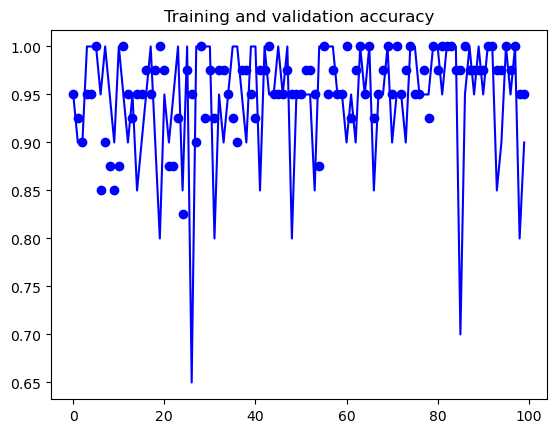

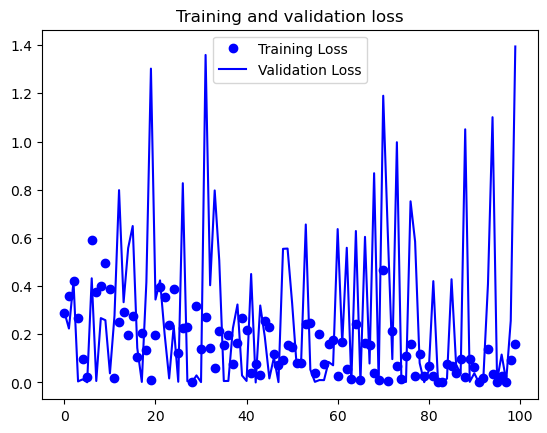

In [10]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
import numpy as np
from IPython.display import display
from PIL import Image
from keras.preprocessing import image

def predict_image(file_path):
    img = image.load_img(file_path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images)
    print(classes)

    # Class labels
    threshold_empty = 0.5
    threshold_unloaded = 0.5
    threshold_loaded = 0.5

    # Class labels
    class_labels = ['empty', 'loaded', 'unloaded']

    # Find the maximum probability and its corresponding class
    predicted_class = np.argmax(classes)

    # Check if the predicted class probability is above the threshold
    if predicted_class == 0 and classes[0, 0] > threshold_empty:
        print(f"The input is {class_labels[0]}.")
    elif predicted_class == 1 and classes[0, 1] > threshold_unloaded:
        print(f"The input is {class_labels[1]}.")
    elif predicted_class == 2 and classes[0, 2] > threshold_loaded:
        print(f"The input is {class_labels[2]}.")
    else:
        print("Uncertain or unrecognized state.")



# Use validation data to calculate precision and recall
file_paths = [
        "D:/team/test/empty/2.png",
        "D:/team/test/unloaded/58.png",
        "D:/team/test/loaded/3958.png"
]


# Predict for each uploaded file using the chosen threshold
for file_path in file_paths:
        predict_image(file_path)


1/1 [==============================] - 0s 127ms/step
[[1. 0. 0.]]
The input is empty.
1/1 [==============================] - 0s 50ms/step
[[0. 0. 1.]]
The input is unloaded.
1/1 [==============================] - 0s 57ms/step
[[0. 1. 1.]]
The input is loaded.


In [20]:
print("Final Training Accuracy:", history.history['acc'][-1])
print("Final Validation Accuracy:", history.history['val_acc'][-1])

Final Training Accuracy: 0.949999988079071
Final Validation Accuracy: 0.8999999761581421


In [22]:
model.save("sih_team.keras")

1/1 [==============================] - 0s 48ms/step


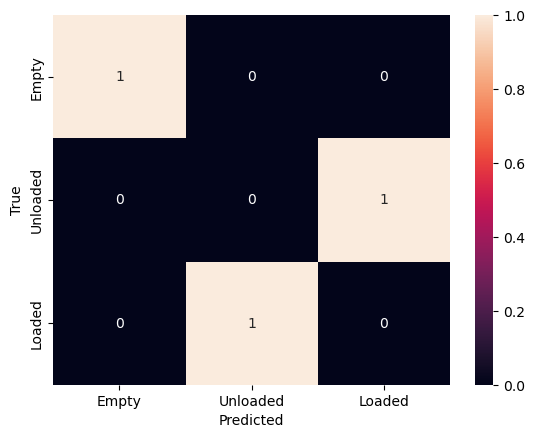

              precision    recall  f1-score   support

       Empty       1.00      1.00      1.00         1
    Unloaded       0.00      0.00      0.00         1
      Loaded       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.33      0.33      0.33         3
weighted avg       0.33      0.33      0.33         3



In [23]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
# Generate predictions for the entire test set
all_predictions = []
all_true_labels = []

file_paths = [
    ("D:/team/test/empty/2.png", 0),
    ("D:/team/test/unloaded/58.png", 1),
    ("D:/team/test/loaded/3958.png", 2)
]

class_labels = ['Empty', 'Unloaded', 'Loaded']


for file_path, true_label in file_paths:
    img = image.load_img(file_path, target_size=(150, 150))
       x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images)
    predicted_class = np.argmax(classes)

    all_predictions.append(predicted_class)
    all_true_labels.append(true_label)

# Create confusion matrix
conf_matrix = confusion_matrix(all_true_labels, all_predictions, labels=[0, 1, 2])

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report
print(classification_report(all_true_labels, all_predictions, target_names=class_labels))
